In [14]:
import pandas as pd
from rdkit import Chem

def prepare_data():
    df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.01.25.csv', index_col=0)
    # df_main = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\init_data\pKa_Prediction_Starting data_2024.05.07.csv', index_col=0)

    SMILES_to_fgroup = {}
    SMILES_to_identificator = {}
    SMILES_to_cycle_type = {}
    SMILES_to_logP = {}
    for index, row in df_main.iterrows():
        SMILES = row['Amides for LogP']
        if pd.isnull(SMILES):
            continue
        
        SMILES_to_fgroup[SMILES] = row['F group']
        SMILES_to_identificator[SMILES] = row['identificator']
        SMILES_to_cycle_type[SMILES] = row['Framework']
        SMILES_to_logP[SMILES] = row['LogP']
    
    return SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP

def train_test_smiles_data(is_canon=True):
    train = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\train.csv')
    test = pd.read_csv(r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\logP_lipophilicity_data\gnn_cv\test.csv')

    train_SMILES = train['Smiles'].tolist()
    test_SMILES = test['Smiles'].tolist()

    if is_canon:
        for train_index in range(len(train_SMILES)):
            train_SMILES[train_index] = Chem.CanonSmiles(train_SMILES[train_index])
        for test_index in range(len(test_SMILES)):
            test_SMILES[test_index] = Chem.CanonSmiles(test_SMILES[test_index])
    
    smiles_to_fold = {}
    for index, row in train.iterrows():
        smiles_to_fold[row['Smiles']] = row['fold_id']
    
    return train_SMILES, test_SMILES, smiles_to_fold

In [15]:
# all test(separate model for each molecule)
relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.0, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.192, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.056, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.0, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': -0.252, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': -0.036, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.276, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.585, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.589, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.016, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.03, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.19, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.302, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': -0.005, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': -0.384, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': -0.154, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': -0.388, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': -0.354, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': -0.232, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': -0.302, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': -0.057, 'FC(F)CCCC(=O)NC1=CC=CC=C1': -0.077, 'O=C(NC1=CC=CC=C1)C1CC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.0, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.585, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 0.0, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.503, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.075, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': -0.176, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.698, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.605, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.198, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.35, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.146, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.0, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 0.023, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.173, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.029, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': -0.375, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.0, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.463, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.908, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.0, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': -0.0, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.636, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.498, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.725, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': -0.0, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.0, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCCC1)C1=CC=CC=C1': -0.0, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.496, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': -0.0, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.4, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.501, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': -0.019, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 0.353, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': -0.049, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': -0.0, 'O=C(N1CCC1)C1=CC=CC=C1': 0.0, 'FC1CN(C1)C(=O)C1=CC=CC=C1': -0.125, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.284, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': 0.18, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.145, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.121, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.354, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.0, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.429, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.429, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.423, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.262, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.55, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.083, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.77, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.679, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.021, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.035, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.211, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.186, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.427, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.321, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.564, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.33, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.73, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.398, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 0.287, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.167, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.702, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.152, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.112, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.586, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.209, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.576, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.252, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.04, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.188, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': -0.03, 'CCNC(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.433, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.232, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.177, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.018, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.486, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': -0.019, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': -0.327, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': -0.41, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.459, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': -0.333, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.278, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.51, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': -0.192, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': -0.169, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.038, 'O=C(NC1CC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.0, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': -0.303, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.596, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.437, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.597, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.05, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.438, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.0, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': -0.037, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.121, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': -0.379, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.157, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': -0.277, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.002, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.0, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.218, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.096, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.633, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.387, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.271, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.056, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 0.204, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': -0.204, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.163, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': -0.237, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.018, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.017, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.358, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': -0.167, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.172}
# 3 models for all models to be in OOS
# relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.0, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': -0.053, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 0.004, 'O=C(NC1=CC=CC=C1)C1CCC1': 0.0, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': -0.096, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.108, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 0.308, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.532, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.532, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.351, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 0.351, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.052, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': -0.052, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': -0.049, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': -0.085, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': -0.221, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': -0.085, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': -0.122, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': -0.234, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 0.032, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.058, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.162, 'O=C(NC1=CC=CC=C1)C1CC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCC1': 0.0, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 0.0, 'CCCCC(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.589, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 0.0, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.583, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.16, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 0.013, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.856, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 1.021, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.261, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.31, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.219, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 0.0, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': -0.014, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 0.038, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.232, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': -0.12, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 0.0, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.768, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.11, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.0, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 0.417, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.186, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.04, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': 0.0, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 0.0, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 0.0, 'O=C(N1CCCCC1)C1=CC=CC=C1': 0.0, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.392, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': 0.0, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 0.0, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': -0.125, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': -0.495, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 0.306, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 0.368, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 0.339, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': 0.0, 'O=C(N1CCC1)C1=CC=CC=C1': 0.0, 'FC1CN(C1)C(=O)C1=CC=CC=C1': 0.092, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': -0.122, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': -0.049, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.338, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.254, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': -0.272, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': -0.071, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.459, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': -0.385, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': -0.304, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': -0.14, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.75, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 0.248, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.597, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.597, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.293, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 0.293, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.078, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -0.198, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.157, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.159, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.153, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 0.173, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.015, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 0.075, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 0.109, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 0.31, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.742, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.24, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': -0.062, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 0.819, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.115, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.754, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.061, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': -0.15, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.115, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 0.095, 'CCNC(=O)C1=CC=CC=C1': 0.0, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.752, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': -0.111, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': -0.023, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.113, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.539, 'CCCNC(=O)C1=CC=CC=C1': 0.0, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': -0.007, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 0.014, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 0.014, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': -0.32, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 0.044, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': -0.162, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': -0.057, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 0.048, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.204, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 0.113, 'O=C(NC1CC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCC1)C1=CC=CC=C1': 0.0, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 0.0, 'CCCCNC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': -0.303, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.543, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.817, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.395, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.207, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.04, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.0, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 0.0, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 0.16, 'O=C(NC1CCC1)C1=CC=CC=C1': 0.0, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 0.212, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': -0.434, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': -0.016, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': -0.303, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 0.031, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 0.0, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 0.0, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': -0.183, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 0.216, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 0.746, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 0.362, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': -0.296, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': -0.055, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 0.217, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': -0.367, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': -0.236, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': -0.191, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 0.053, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -0.2, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.387, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.0, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': -0.328, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': -0.286}

relevances_fluorine_all_temp = {}
for smiles, relevance in relevances_fluorine_all.items():
    relevances_fluorine_all_temp[smiles] = round(relevance, 2)
relevances_fluorine_all = relevances_fluorine_all_temp.copy()

is_predicted_logP = False

"""predicted logp values"""
# 3 models (cv models data from test)
# relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 2.717, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 2.469, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 2.286, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 2.829, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 2.893, 'O=C(NC1=CC=CC=C1)C1CCC1': 2.207, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': 2.111, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 2.315, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 2.515, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.674, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.674, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.493, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.493, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.155, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.155, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': 2.158, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': 2.411, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': 2.275, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': 2.695, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': 2.909, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': 2.796, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 2.888, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 2.195, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 1.986, 'O=C(NC1=CC=CC=C1)C1CC1': 1.867, 'O=C(NC1=CC=CC=C1)C1CCCC1': 2.502, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 2.855, 'CCCCC(=O)NC1=CC=CC=C1': 2.43, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 2.069, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 1.479, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 2.478, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 2.724, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 2.301, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 2.219, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.724, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 2.888, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.128, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 2.106, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.086, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 2.535, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 2.521, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 2.381, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 2.429, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': 2.413, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 2.533, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 2.429, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 2.279, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 2.199, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 2.162, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 1.431, 'O=C(N1CCCC1)C1=CC=CC=C1': 1.052, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': 1.946, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 2.374, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 2.348, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 2.395, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': 1.957, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 2.202, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 2.162, 'O=C(N1CCCCC1)C1=CC=CC=C1': 1.67, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 2.323, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': 2.296, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 1.95, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': 1.722, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': 1.811, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 2.153, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 1.134, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 1.434, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 1.878, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': 1.538, 'O=C(N1CCC1)C1=CC=CC=C1': 0.883, 'FC1CN(C1)C(=O)C1=CC=CC=C1': 0.975, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': 0.93, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': 1.252, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': 0.963, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.047, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': 1.398, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': 1.599, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': 1.211, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': 0.97, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': 1.051, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.215, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 2.577, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 2.074, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.55, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.55, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.246, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.246, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.748, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.755, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.827, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.829, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.454, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.474, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.898, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.081, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 1.115, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 1.484, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 2.097, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 1.595, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 1.608, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.87, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.186, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 1.638, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 1.067, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.734, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 1.369, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 1.349, 'CCNC(=O)C1=CC=CC=C1': 1.302, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 2.107, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 1.244, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': 1.731, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 1.765, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 2.292, 'CCCNC(=O)C1=CC=CC=C1': 1.652, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 1.946, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 2.262, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 2.546, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': 2.212, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 2.874, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': 2.558, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': 2.664, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 1.985, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 2.141, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 1.765, 'O=C(NC1CC1)C1=CC=CC=C1': 1.604, 'O=C(NC1CCCC1)C1=CC=CC=C1': 2.153, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 2.72, 'CCCCNC(=O)C1=CC=CC=C1': 1.937, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 2.536, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': 2.729, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 2.369, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 2.186, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.999, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 1.811, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.644, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 1.701, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.615, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 2.095, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 2.177, 'O=C(NC1CCC1)C1=CC=CC=C1': 1.986, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 2.131, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': 2.883, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': 1.52, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': 2.708, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 2.017, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 3.318, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 2.338, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': 1.353, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 1.751, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 2.319, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 2.079, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 1.877, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': 1.689, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.234, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 1.343, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': 2.014, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 1.749, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': 2.126, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 2.41, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': 0.979, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 2.373, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.141, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': 2.684, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': 2.077}
# only one model that was used for training
# relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 3.012, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 2.915, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 2.783, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 2.662, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 2.855, 'O=C(NC1=CC=CC=C1)C1CCC1': 2.317, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': 1.918, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 2.329, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 2.511, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.945, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.945, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.384, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.384, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.082, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.082, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': 2.243, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': 2.371, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': 2.448, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': 2.615, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': 2.894, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': 2.957, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': 2.98, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 2.232, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 2.099, 'O=C(NC1=CC=CC=C1)C1CC1': 1.919, 'O=C(NC1=CC=CC=C1)C1CCCC1': 2.7, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': 3.273, 'CCCCC(=O)NC1=CC=CC=C1': 2.363, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 2.057, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 1.515, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 2.353, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 2.872, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 2.383, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 2.055, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.621, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 2.553, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.158, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 2.279, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 1.754, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 2.487, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 2.429, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 2.629, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 2.379, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': 2.353, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 2.756, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 2.404, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 2.357, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 1.981, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 2.217, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 1.584, 'O=C(N1CCCC1)C1=CC=CC=C1': 1.289, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': 1.965, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 2.29, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 2.57, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 2.492, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': 1.921, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 2.513, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 2.166, 'O=C(N1CCCCC1)C1=CC=CC=C1': 1.536, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 2.603, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': 2.222, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 2.48, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': 1.87, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': 1.801, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 2.307, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 1.226, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 0.86, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 2.013, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': 2.016, 'O=C(N1CCC1)C1=CC=CC=C1': 1.126, 'FC1CN(C1)C(=O)C1=CC=CC=C1': 0.973, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': 1.029, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': 1.368, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.025, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.087, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': 1.348, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': 1.578, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': 0.876, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': 1.231, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': 1.217, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.223, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 2.583, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 2.082, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.664, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.664, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.052, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.052, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.719, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.719, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 2.178, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.918, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.896, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.625, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.837, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.481, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 1.335, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 1.439, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 2.164, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 1.866, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 1.55, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.858, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.563, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 1.758, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 1.392, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.99, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 1.457, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 1.299, 'CCNC(=O)C1=CC=CC=C1': 1.333, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 2.098, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 1.512, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': 1.708, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 1.847, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 2.212, 'CCCNC(=O)C1=CC=CC=C1': 1.798, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 1.923, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 1.989, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 2.323, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': 2.296, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 2.615, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': 2.612, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': 2.546, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 2.082, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 1.91, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 1.847, 'O=C(NC1CC1)C1=CC=CC=C1': 1.489, 'O=C(NC1CCCC1)C1=CC=CC=C1': 2.381, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 3.029, 'CCCCNC(=O)C1=CC=CC=C1': 2.15, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 3.108, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': 2.612, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 2.404, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 2.013, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 2.138, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 1.65, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.391, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 1.799, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.603, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 2.055, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 2.076, 'O=C(NC1CCC1)C1=CC=CC=C1': 1.986, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 2.131, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': 2.883, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': 1.52, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': 2.708, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 2.017, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 3.318, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 2.338, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': 1.353, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 1.751, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 2.319, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 2.079, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 1.877, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': 1.689, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.234, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 1.343, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': 2.014, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 1.749, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': 2.126, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 2.41, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': 0.979, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 2.373, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 2.141, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': 2.684, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': 2.077}
# separate model per every molecule
# relevances_fluorine_all = {'O=C(NC1=CC=CC=C1)C1CCCCC1': 0.918, 'O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1': 1.874, 'O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1': 2.113, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 1.628, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1': 1.187, 'O=C(NC1=CC=CC=C1)C1CCC1': 1.091, 'FCC1(CCC1)C(=O)NC1=CC=CC=C1': 12.08, 'FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 1.488, 'FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1': 1.583, 'FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 2.078, 'FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 1.793, '[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 1.518, '[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 1.812, '[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 1.336, '[H]C([H])(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1': 1.636, 'FC1(F)CC(C1)C(=O)NC1=CC=CC=C1': 1.378, 'FC1(F)CCCC1C(=O)NC1=CC=CC=C1': 1.818, 'FC1(F)CCC(C1)C(=O)NC1=CC=CC=C1': 0.822, 'FC1(F)CCCCC1C(=O)NC1=CC=CC=C1': 1.571, 'FC1(F)CCCCCC1C(=O)NC1=CC=CC=C1': 1.118, 'FC1(F)CCCCC(C1)C(=O)NC1=CC=CC=C1': 2.421, 'FC1(F)CCCC(CC1)C(=O)NC1=CC=CC=C1': -1.301, 'CCC(F)(F)CC(=O)NC1=CC=CC=C1': 0.823, 'FC(F)CCCC(=O)NC1=CC=CC=C1': 0.942, 'O=C(NC1=CC=CC=C1)C1CC1': 1.078, 'O=C(NC1=CC=CC=C1)C1CCCC1': 1.321, 'O=C(NC1=CC=CC=C1)C1CCCCCC1': -2.364, 'CCCCC(=O)NC1=CC=CC=C1': 0.844, 'FC(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 17.129, 'O=C(NC1=CC=CC=C1)C12CC(C1)CO2': 1.137, 'O=C(NC1=CC=CC=C1)C1=CC=CC=C1': 1.675, 'FC(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 1.583, '[H]C(F)(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 1.607, '[H]C([H])(F)[C@@H]1CC[C@H]1C(=O)NC1=CC=CC=C1': 1.7, 'FC(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 1.685, 'FC(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 1.966, '[H]C(F)(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 0.795, '[H]C(F)(F)[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 1.691, '[H]C([H])(F)[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 1.351, 'O=C(NC1=CC=CC=C1)C1CC11CC1': 1.271, 'FC1(F)C(C(=O)NC2=CC=CC=C2)C11CC1': 1.321, 'FC1(F)CC11CC1C(=O)NC1=CC=CC=C1': 1.29, 'FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 1.053, 'FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1': 1.384, 'O=C(NC1CCCCC1)C1=CC=CC=C1': 1.157, 'O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 1.537, 'O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1': 1.867, 'FC(F)(F)C12CC(C1)CN2C(=O)C1=CC=CC=C1': 1.399, 'FC(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.694, 'O=C(N1CC2CC1C2)C1=CC=CC=C1': 1.113, 'O=C(N1CCCC1)C1=CC=CC=C1': 0.64, 'CC12CC(C1)CN2C(=O)C1=CC=CC=C1': 1.144, 'FC(F)(F)C12CCC(CN1C(=O)C1=CC=CC=C1)C2': 1.262, 'FC(F)(F)C12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 1.729, 'FC(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 0.822, 'O=C(N1CC2CCC1C2)C1=CC=CC=C1': 1.357, 'CC12CCC(CC1)CN2C(=O)C1=CC=CC=C1': 2.151, 'O=C(N1CC2CCC1CC2)C1=CC=CC=C1': 1.481, 'O=C(N1CCCCC1)C1=CC=CC=C1': 1.137, 'FC(F)(F)C12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 1.568, 'O=C(N1CC2CC1CCC2)C1=CC=CC=C1': 1.831, 'CC12CC(CN1C(=O)C1=CC=CC=C1)CCC2': 1.041, 'FC1(F)CC2CC(CN(C2)C(=O)C2=CC=CC=C2)C1': 1.104, 'FC1(F)CC2CN(CC(C1)C2(F)F)C(=O)C1=CC=CC=C1': 1.681, 'FC1(F)C2CCCC1CN(C2)C(=O)C1=CC=CC=C1': 1.456, 'FC1(F)C2COCC1CN(C2)C(=O)C1=CC=CC=C1': 1.137, 'O=C(N1CC2COCC(C2)C1)C1=CC=CC=C1': 1.588, 'FC1(F)C2CCC1CN(C2)C(=O)C1=CC=CC=C1': 1.189, 'O=C(N1CC2CCC(C2)C1)C1=CC=CC=C1': 1.877, 'O=C(N1CCC1)C1=CC=CC=C1': 0.751, 'FC1CN(C1)C(=O)C1=CC=CC=C1': 1.184, 'FC1CCN(C1)C(=O)C1=CC=CC=C1': 1.239, 'FC1(F)CCN(C1)C(=O)C1=CC=CC=C1': 1.4, 'F[C@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.115, 'F[C@@H]1CN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.057, 'FC1CCCN(C1)C(=O)C1=CC=CC=C1': 0.362, 'FC1(F)CCCN(C1)C(=O)C1=CC=CC=C1': 1.296, 'F[C@H]1C[C@@H](F)CN(C1)C(=O)C1=CC=CC=C1': 1.204, 'F[C@H]1C[C@H](F)CN(C1)C(=O)C1=CC=CC=C1': 1.392, 'F[C@@H]1CCN(C[C@@H]1F)C(=O)C1=CC=CC=C1': 0.497, 'F[C@@H]1CCN(C[C@H]1F)C(=O)C1=CC=CC=C1': 1.075, 'FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 0.577, 'FCC1(CCC1)NC(=O)C1=CC=CC=C1': 31.213, 'FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 2.055, 'FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.712, '[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.505, '[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.108, '[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': 1.362, '[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1': -1.92, '[H]C(F)(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.385, '[H]C([H])(F)C1CCCCN1C(=O)C1=CC=CC=C1': 1.114, '[H]C(F)(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.24, '[H]C([H])(F)C1CCCN1C(=O)C1=CC=CC=C1': 1.098, 'FC(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.43, '[H]C(F)(F)C1CCN1C(=O)C1=CC=CC=C1': 1.422, '[H]C([H])(F)C1CCN1C(=O)C1=CC=CC=C1': 1.199, '[H]C(F)(F)CNC(=O)C1=CC=CC=C1': 1.603, 'FC(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 1.29, '[H]C(F)(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 1.538, '[H]C([H])(F)C1CCCN(C1)C(=O)C1=CC=CC=C1': 0.968, 'FC(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.658, '[H]C(F)(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.294, 'FC(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 1.672, '[H]C(F)(F)C1CN(C1)C(=O)C1=CC=CC=C1': 1.64, '[H]C([H])(F)C1CN(C1)C(=O)C1=CC=CC=C1': 0.689, '[H]C(F)(F)CCNC(=O)C1=CC=CC=C1': 0.889, '[H]C([H])(F)CCNC(=O)C1=CC=CC=C1': 1.126, 'CCNC(=O)C1=CC=CC=C1': 0.23, 'FC(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 2.18, '[H]C([H])(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 1.219, '[H]C([H])(F)CCCNC(=O)C1=CC=CC=C1': 1.139, '[H]C(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.824, 'FC(F)(F)CCCNC(=O)C1=CC=CC=C1': 0.852, 'CCCNC(=O)C1=CC=CC=C1': 0.878, 'FC1(F)CC(C1)NC(=O)C1=CC=CC=C1': 1.55, 'FC1(F)CCCC1NC(=O)C1=CC=CC=C1': 0.883, 'FC1(F)CCCCC1NC(=O)C1=CC=CC=C1': 1.289, 'FC1(F)CCCC(C1)NC(=O)C1=CC=CC=C1': 0.982, 'FC1(F)CCCCCC1NC(=O)C1=CC=CC=C1': 1.377, 'FC1(F)CCCCC(C1)NC(=O)C1=CC=CC=C1': 1.013, 'FC1(F)CCCC(CC1)NC(=O)C1=CC=CC=C1': 1.689, 'CCC(F)(F)CNC(=O)C1=CC=CC=C1': 1.382, 'CC(F)(F)CCNC(=O)C1=CC=CC=C1': 1.686, 'FC(F)CCCNC(=O)C1=CC=CC=C1': 1.123, 'O=C(NC1CC1)C1=CC=CC=C1': 0.421, 'O=C(NC1CCCC1)C1=CC=CC=C1': 1.184, 'O=C(NC1CCCCCC1)C1=CC=CC=C1': 1.458, 'CCCCNC(=O)C1=CC=CC=C1': 0.87, 'O=C(NC1CC2(CCC2)C1)C1=CC=CC=C1': 1.193, 'FC1(F)CC2(CC(C2)NC(=O)C2=CC=CC=C2)C1': 1.252, 'FC(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 1.915, 'FC(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 1.787, 'FC(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.527, '[H]C(F)(F)[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 0.825, '[H]C(F)(F)[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': -64.078, 'C[C@@H]1C[C@H]1NC(=O)C1=CC=CC=C1': 1.416, 'C[C@@H]1C[C@@H]1NC(=O)C1=CC=CC=C1': 1.04, 'O=C(NC1CC11CC1)C1=CC=CC=C1': 0.973, 'FC1(F)CC11CC1NC(=O)C1=CC=CC=C1': 1.741, 'O=C(NC1CCC1)C1=CC=CC=C1': 1.484, 'FC1(F)CC1C(=O)NC1=CC=CC=C1': 1.157, 'FC1(F)CC2(CC(C2)C(=O)NC2=CC=CC=C2)C1': 1.102, 'FC1CCN(CC1)C(=O)C1=CC=CC=C1': 1.109, 'FC1(F)CCC(CC1)C(=O)NC1=CC=CC=C1': 1.613, '[H]C(F)(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 1.577, 'O=C(NC1=CC=CC=C1)C1CC2(CCC2)C1': 2.314, 'O=C(N1CC2CCCC(C2)C1)C1=CC=CC=C1': 1.732, 'FC1(F)CCN(CC1)C(=O)C1=CC=CC=C1': 1.784, '[H]C(F)(F)C1CCN(CC1)C(=O)C1=CC=CC=C1': 1.496, 'C[C@@H]1C[C@@H]1C(=O)NC1=CC=CC=C1': 1.167, 'FC(F)(F)CCNC(=O)C1=CC=CC=C1': 1.747, '[H]C(F)(F)C12CC(C1)(OC2)C(=O)NC1=CC=CC=C1': 1.123, 'FC1(F)CCC1NC(=O)C1=CC=CC=C1': 1.248, '[H]C([H])(F)C1CCN(C1)C(=O)C1=CC=CC=C1': 1.587, 'FC1(F)CN(C1)C(=O)C1=CC=CC=C1': 1.35, 'FC1(F)CCC(C1)NC(=O)C1=CC=CC=C1': 1.247, '[H]C([H])(F)[C@@H]1CC[C@H]1NC(=O)C1=CC=CC=C1': 1.736, 'FC1(F)CCC1C(=O)NC1=CC=CC=C1': 0.778, 'FC1(F)[C@H]2C[C@@H](C[C@@H]12)NC(=O)C1=CC=CC=C1': 1.734, '[H]C([H])(F)CNC(=O)C1=CC=CC=C1': -2.558, 'FC(F)C1(CCC1)NC(=O)C1=CC=CC=C1': 1.56, 'C[C@@H]1C[C@H]1C(=O)NC1=CC=CC=C1': 1.404, 'FC1(F)CCCC(C1)C(=O)NC1=CC=CC=C1': 1.289, 'CC(F)(F)CCC(=O)NC1=CC=CC=C1': 1.632}
SMILES_to_fgroup, SMILES_to_identificator, SMILES_to_cycle_type, SMILES_to_logP = prepare_data()
train_smiles, test_smiles, smiles_to_fold = train_test_smiles_data()

def remove_substructure(mol, mol_to_remove):
    if mol.HasSubstructMatch(mol_to_remove):
        mol = Chem.DeleteSubstructs(mol, mol_to_remove)

    return mol

def find_relevance_for_non_canon_mol(smiles_canon, relevances_fluorine_all):
    for SMILES, relevance in relevances_fluorine_all.items():
        if Chem.CanonSmiles(SMILES) == smiles_canon:
            return relevance
        
    for SMILES, logP in SMILES_to_logP.items():
        if Chem.CanonSmiles(SMILES) == smiles_canon:
            return logP
    
    return None

functional_group_to_smiles_for_logP_non_H = {
    "CF3": "C(F)(F)F", 
    "CH2F": "CF", 
    "gem-CF2": "F", 
    "CHF2": "C(F)(F)",
    "CHF": "F",
    "non-F": ""
}

if is_predicted_logP:
    relevances_fluorine = {}
    for SMILES, relevance in relevances_fluorine_all.items():
        if "secon" in SMILES_to_identificator[SMILES].lower():
            mol = Chem.MolFromSmiles(SMILES)

            f_group = SMILES_to_fgroup[SMILES]
            f_group_smiles = functional_group_to_smiles_for_logP_non_H[f_group]
            
            mol_fluorine = Chem.MolFromSmiles(f_group_smiles)
            mol_without_F = remove_substructure(mol, mol_fluorine)
            smiles_without_F = Chem.MolToSmiles(mol_without_F)

            non_f_relevance = find_relevance_for_non_canon_mol(smiles_without_F, relevances_fluorine_all)
            if non_f_relevance is not None:
                relevances_fluorine[SMILES] = round(relevance - find_relevance_for_non_canon_mol(smiles_without_F, relevances_fluorine_all), 3)
else:
    relevances_fluorine = {}
    for SMILES, relevance in relevances_fluorine_all.items():
        if "secon" in SMILES_to_identificator[SMILES].lower():
            relevances_fluorine[SMILES] = relevance

cyclobutane = {1: {}, 2: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
methane = {1: {}, 2: {}, 3: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

In [16]:
pred_logPs = list(relevances_fluorine_all.values())
true_logPs = []
for smiles, logP_pred in relevances_fluorine_all.items():
    true_logPs.append(SMILES_to_logP[smiles])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def calculate_metrics(true_values, pred_values):
    mse = round(mean_squared_error(true_values, pred_values),3)
    mae = round(mean_absolute_error(true_values, pred_values),3)
    r_score = round(r2_score(true_values, pred_values),3)

    return {"mse": mse,
            "mae": mae,
            "r_score": r_score,}

calculate_metrics(true_logPs, pred_logPs)

{'mse': 4.268, 'mae': 1.977, 'r_score': -12.875}

In [17]:
from collections import deque

functional_group_to_smiles = {
    "CF3": "CC(F)(F)F", 
    "CH2F": "CCF", 
    "gem-CF2": "CF", 
    "CHF2": "CC(F)(F)",
    "CHF": "CF",
    "non-F": ""
}

def find_the_closest_nitrogen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'n':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance

In [18]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_secondary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return False
    
    return True


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_secondary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    # print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

------------------------------ 1
CH2F 1.4
CHF2 1.51
CF3 1.75
CH2F 1.75
CHF2 1.88
CF3 2.12
CH2F 2.0
CHF2 2.04
CF3 2.54
------------------------------ 2
CH2F 0.93
CHF2 1.4
CF3 1.66
CH2F 1.4
CHF2 1.4
CF3 1.7
CH2F 1.52
CHF2 1.73
CF3 2.21
------------------------------ 3
CH2F 1.45
CHF2 1.67
CF3 2.2


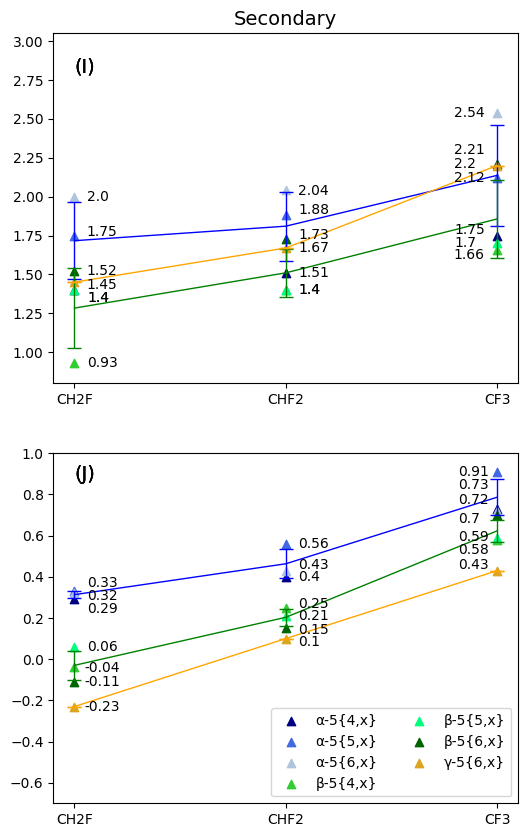

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from adjustText import adjust_text

cyclobutane_color = {1: 'navy', 2: 'limegreen', 3: 'darkorange'}
cyclopentane_color = {1: 'royalblue', 2: 'springgreen', 3: 'navajowhite'}
cyclohexan_color = {1: 'lightsteelblue', 2: 'darkgreen', 3: 'goldenrod'}
methane_color = {1: 'mediumblue', 2: 'lightgreen', 3: 'palegoldenrod'}

line_color = {1: "blue", 2: "green", 3: "orange"}

cyclobutane_name = {1: "α-5{4,x}", 2: "β-5{4,x}", 3: ""}
cyclopentane_name = {1: "α-5{5,x}", 2: "β-5{5,x}", 3: ""}
cyclohexan_name = {1: "α-5{6,x}", 2: "β-5{6,x}", 3: "γ-5{6,x}"}
methane_name = {1: "", 2: "", 3: ""}   

cyclobutane_logP = {1: {'H': [1.13]}, 2: {'H': [1.13]}, 3: {'H': [1.13]}}
cyclopentane_logP = {1: {'H': [1.19]}, 2: {'H': [1.19]}, 3: {'H': [1.13]}}
cyclohexan_logP = {1: {'H': [1.39]}, 2: {'H': [1.39]}, 3: {'H': [1.39]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))

for distance_global in range(1, 4):

    print("-" * 30, distance_global)
    
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():

        smiles_type = "Outlier"
        fold_id = ""
        # print(SMILES in train_smiles, SMILES)
        if Chem.CanonSmiles(SMILES) in train_smiles:
            smiles_type = "Used for train"
            fold_id = f"{smiles_to_fold[SMILES]}"
        if Chem.CanonSmiles(SMILES) in test_smiles:
            smiles_type = "Used for test"
            
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES], smiles_type, fold_id)

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        # print(X_local, y_relevance)
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local):
                x_shift, y_shift = -17, -6

            # print(len(str(y_logP[i])), y_relevance[i])
            if len(str(y_relevance[i])) == 3:
                x_shift -= 3
            
            # CH2F
            if y_relevance[i] == 0.29:
                y_shift = -10
            elif y_relevance[i] == 0.32:
                y_shift = -5
            elif y_relevance[i] == 0.33:
                y_shift = 3
            
            # CHF2
            elif y_relevance[i] == 0.43:
                y_shift = 1
            elif y_relevance[i] == 0.25:
                y_shift = 0
            elif y_relevance[i] == 0.21:
                y_shift = -3
            elif y_relevance[i] == 0.15:
                y_shift = -4
            elif y_relevance[i] == 0.1:
                y_shift = -5
            
            # CF3
            elif y_relevance[i] == 0.91:
                y_shift = -3
            elif y_relevance[i] == 0.73:
                y_shift = 14
            elif y_relevance[i] == 0.72:
                y_shift = 5
            elif y_relevance[i] == 0.58:
                y_shift = -10
            elif y_relevance[i] == 0.59:
                y_shift = -2
            
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
        
        
        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local):
                x_shift, y_shift = -20, -3
            
            if len(str(y_logP[i])) == 3:
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_logP[i] == 1.4:
                    y_shift = -9
                elif y_logP[i] == 1.45:
                    y_shift = -5
                elif y_logP[i] == 1.75:
                    y_shift = 0
            elif X_local[i] == "CHF2":
                if y_logP[i] == 1.73:
                    y_shift = 0
                elif y_logP[i] == 1.88:
                    y_shift = 1
            elif X_local[i] == "CF3":
                if y_logP[i] == 2.2:
                    y_shift = -2
                elif y_logP[i] == 2.21:
                    y_shift = 7
                elif y_logP[i] == 1.66:
                    y_shift = -7
                elif y_logP[i] == 1.75:
                    y_shift = 1
                

            
            print(X_local[i], y_logP[i])

            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')

        # adjust_text(texts2, ax=ax2, arrowprops=dict(arrowstyle='->', color='red'))       
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    # print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance_global], label=label[distance_global], linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax1.set_xlabel("Fluorine groups")
    # ax1.set_ylabel("SME", fontsize=14)
    # ax1.set_ylim(-0.35, 1)
    ax1.set_ylim(-0.7, 1)

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.set_ylim(0.8, 3.05)
    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance_global], label=label[distance_global], linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax2.set_xlabel("Fluorine groups")
    # ax2.set_ylabel("LogP", fontsize=14)
    ax2.set_title("Secondary", fontsize=14)

    ax1.legend(loc='lower right', ncols=2)
    # ax2.legend()

    ax2.text(0.0, 2.8, '(I)', fontsize = 14)
    ax1.text(0.0, 0.87, '(J)', fontsize = 14)


plt.show()


primary amines

In [20]:
# all test (3 models)
# relevances_fluorine_all = {'O=C(O)C1CCC(F)(F)CC1': -0.506, 'O=C(O)C1CCCCC1': 0.0, 'O=C(O)[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.524, 'O=C(O)[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -0.524, 'O=C(O)C1CCC1': 0.0, 'O=C(O)C1(CF)CCC1': -1.136, 'O=C(O)C1(C(F)F)CCC1': -1.605, 'O=C(O)C1(C(F)(F)F)CCC1': -1.827, 'O=C(O)[C@H]1C[C@H](C(F)(F)F)C1': -0.902, 'O=C(O)[C@H]1C[C@@H](C(F)(F)F)C1': -0.902, 'O=C(O)[C@H]1C[C@H](C(F)F)C1': -0.757, 'O=C(O)[C@H]1C[C@@H](C(F)F)C1': -0.757, 'O=C(O)[C@H]1C[C@H](CF)C1': -0.579, 'O=C(O)[C@H]1C[C@@H](CF)C1': -0.579, 'O=C(O)C1CC1(F)F': -1.324, 'O=C(O)C1CCC1(F)F': -1.16, 'O=C(O)C1CC(F)(F)C1': -0.836, 'O=C(O)C1CCCC1(F)F': -1.013, 'O=C(O)C1CCC(F)(F)C1': -0.749, 'O=C(O)C1CCCCC1(F)F': -0.986, 'O=C(O)C1CCCCCC1(F)F': -0.986, 'O=C(O)C1CCCCC(F)(F)C1': -0.586, 'O=C(O)C1CCCC(F)(F)CC1': -0.328, 'CCC(F)(F)CC(=O)O': -1.182, 'CC(F)(F)CCC(=O)O': -0.582, 'O=C(O)C1CC1': 0.0, 'O=C(O)C1CCCC1': 0.0, 'O=C(O)C1CCCCCC1': 0.0, 'CCCCC(=O)O': 0.0, 'O=C(O)C1CC2(CCC2)C1': 0.0, 'O=C(O)C1CC2(C1)CC(F)(F)C2': -0.193, 'O=C(O)[C@@H]1CC[C@H]1C(F)(F)F': -0.736, 'O=C(O)[C@@H]1CC[C@H]1C(F)F': -0.494, 'O=C(O)[C@@H]1CC[C@H]1CF': -0.329, 'O=C(O)[C@@H]1C[C@H]1C(F)(F)F': -0.841, 'O=C(O)[C@H]1C[C@H]1C(F)(F)F': -0.841, 'O=C(O)[C@@H]1C[C@H]1C(F)F': -0.551, 'O=C(O)[C@H]1C[C@H]1C(F)F': -0.551, 'O=C(O)[C@@H]1C[C@H]1CF': -0.294, 'C[C@@H]1C[C@H]1C(=O)O': 0.0, 'C[C@@H]1C[C@@H]1C(=O)O': 0.0, 'O=C(O)C1C(F)(F)C12CC2': -1.072, 'N[C@@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.297, 'N[C@H]1C[C@@H]2[C@H](C1)C2(F)F': -1.217, 'NC1CCC(F)(F)CC1': -1.192, 'NC1CCCCC1': 0.0, 'N[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'N[C@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'FC(F)(F)C12CC(CN1)C2': -4.464, 'C1NC2CC1C2': 0.0, 'C1CCNC1': 0.0, 'CC12CC(CN1)C2': 0.0, 'FC(F)(F)C12CCC(CC1)CN2': -4.684, 'C1CC2CC1CN2': 0.0, 'C1CC2CCC1CN2': 0.0, 'C1CCNCC1': 0.0, 'FC(F)(F)C12CCCC(CN1)C2': -4.472, 'C1CC2CNC(C1)C2': 0.0, 'FC1(F)CC2CNCC(C2)C1': -0.046, 'FC1(F)CC2CNCC(C1)C2(F)F': -2.79, 'FC1(F)C2CCCC1CNC2': -2.638, 'C1CC2CNCC(C1)C2': 0.0, 'FC1(F)C2CNCC1COC2': -3.025, 'C1NCC2COCC1C2': 0.0, 'C1CC2CNCC1C2': 0.0, 'C1CNC1': 0.0, 'FC1(F)CNC1': -4.695, 'FC1CCNC1': -2.517, 'FC1(F)CCNC1': -3.875, 'F[C@@H]1CNC[C@@H]1F': -4.274, 'F[C@@H]1CNC[C@H]1F': -4.379, 'FC1CCCNC1': -1.699, 'FC1(F)CCCNC1': -2.897, 'F[C@@H]1CNC[C@H](F)C1': -3.976, 'F[C@@H]1CNC[C@@H](F)C1': -3.324, 'FC1CCNCC1': -1.41, 'F[C@@H]1CCNC[C@@H]1F': -3.419, 'F[C@@H]1CCNC[C@H]1F': -3.505, 'NC1(C(F)(F)F)CCC1': -3.41, 'NC1(C(F)F)CCC1': -3.94, 'NC1(CF)CCC1': -3.136, 'NC1CCC1': 0.0, 'N[C@H]1C[C@H](C(F)(F)F)C1': -1.22, 'N[C@H]1C[C@@H](C(F)(F)F)C1': -1.179, 'N[C@H]1C[C@H](C(F)F)C1': -1.106, 'N[C@H]1C[C@@H](C(F)F)C1': -1.03, 'N[C@H]1C[C@H](CF)C1': -0.812, 'N[C@H]1C[C@@H](CF)C1': -0.698, 'FC(F)C1CCCCN1': -2.857, 'FC(F)C1CCCN1': -2.701, 'FC(F)(F)C1CCN1': -4.154, 'FC(F)C1CCN1': -3.019, 'NCCF': -3.428, 'FC(F)(F)C1CCCNC1': -1.296, 'FC(F)C1CCCNC1': -0.875, 'FCC1CCCNC1': -0.284, 'FC(F)C1CCNC1': -0.838, 'FCC1CCNC1': -0.277, 'FC(F)(F)C1CNC1': -2.507, 'FC(F)C1CNC1': -1.832, 'FCC1CNC1': -0.799, 'NCCC(F)F': -1.574, 'NCCCF': -1.24, 'CCN': 0.0, 'FC(F)C1CCNCC1': -0.389, 'FCC1CCNCC1': -0.073, 'NCCCCF': -0.264, 'NCCCC(F)F': -0.323, 'NCCCC(F)(F)F': -0.579, 'CCCN': 0.0, 'NC1CCC1(F)F': -3.06, 'NC1CC(F)(F)C1': -1.584, 'NC1CCCCC1(F)F': -2.972, 'NC1CCCC(F)(F)C1': -1.022, 'NC1CCCCCC1(F)F': -3.08, 'NC1CCCCC(F)(F)C1': -1.121, 'NC1CCCC(F)(F)CC1': -0.778, 'CCC(F)(F)CN': -2.46, 'CC(F)(F)CCN': -0.829, 'NC1CC1': 0.0, 'NC1CCCC1': 0.0, 'NC1CCCCCC1': 0.0, 'NC1CC2(CCC2)C1': 0.0, 'NC1CC2(C1)CC(F)(F)C2': -0.451, 'N[C@@H]1CC[C@H]1C(F)(F)F': -2.264, 'N[C@@H]1CC[C@H]1CF': -1.658, 'N[C@@H]1C[C@H]1C(F)(F)F': -2.056, 'N[C@H]1C[C@H]1C(F)(F)F': -2.019, 'N[C@@H]1C[C@H]1C(F)F': -1.992, 'N[C@H]1C[C@H]1C(F)F': -1.937, 'C[C@@H]1C[C@H]1N': 0.0, 'NC1CC12CC2': 0.0, 'O=C(O)C1CC12CC2(F)F': -0.646, 'O=C(O)C12CC(CO1)C2': 0.0, 'O=C(O)C1CCCC(F)(F)C1': -0.608, 'O=C(O)[C@@H]1C[C@@H]2C[C@@H]2C1': 0.0, 'O=C(O)C1CC2(CC(F)C2)C1': -0.038, 'O=C(O)C1CC12CC2': 0.0, 'O=C(O)CCCC(F)F': -0.421, 'FC(F)(F)C12CCC(CN1)C2': -4.415, 'FC(F)(F)C1CCCN1': -4.459, 'FC(F)(F)C1CCCCN1': -3.831, 'NC1CC12CC2(F)F': -1.007, 'NC1CCCC1(F)F': -3.193, 'FC1(F)CCNCC1': -2.733, 'FC1(F)C2CCC1CNC2': -2.793, 'NC1CCC(F)(F)C1': -1.693, 'FC1CNC1': -3.253, 'N[C@@H]1CC[C@H]1C(F)F': -1.941, 'C[C@@H]1C[C@@H]1N': 0.0, 'FCC1CCCCN1': -1.027, 'FCC1CCCN1': -0.801, 'FCC1CCN1': -1.1, 'NC1CC2(C1)CC(F)C2': -0.064, 'FC(F)(F)C1CCNCC1': -0.266, 'CCCCN': 0.0, 'CC12CCC(CC1)CN2': 0.0, 'CC12CCCC(CN1)C2': 0.0}
# relevances_fluorine = {}
# for SMILES, relevance in relevances_fluorine_all.items():
#     if "prima" in SMILES_to_identificator[SMILES].lower():
#         relevances_fluorine[SMILES] = relevance



if is_predicted_logP:
    relevances_fluorine = {}
    for SMILES, relevance in relevances_fluorine_all.items():
        if "prima" in SMILES_to_identificator[SMILES].lower():
            mol = Chem.MolFromSmiles(SMILES)

            f_group = SMILES_to_fgroup[SMILES]
            f_group_smiles = functional_group_to_smiles_for_logP_non_H[f_group]
            
            mol_fluorine = Chem.MolFromSmiles(f_group_smiles)
            mol_without_F = remove_substructure(mol, mol_fluorine)
            smiles_without_F = Chem.MolToSmiles(mol_without_F)

            non_f_relevance = find_relevance_for_non_canon_mol(smiles_without_F, relevances_fluorine_all)
            if non_f_relevance is not None:
                relevances_fluorine[SMILES] = round(relevance - find_relevance_for_non_canon_mol(smiles_without_F, relevances_fluorine_all), 3)
else:
    relevances_fluorine = {}
    for SMILES, relevance in relevances_fluorine_all.items():
        if "prima" in SMILES_to_identificator[SMILES].lower():
            relevances_fluorine[SMILES] = relevance

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1

In [21]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    is_secondary_amine_mol = is_primary_amine(mol)
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_nitrogen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    if not is_secondary_amine_mol:
        smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen)

FC1(F)[C@H]2C[C@H](C[C@@H]12)NC(=O)C1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 4
FC1(F)CCC(CC1)NC(=O)C1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 4
O=C(NC1CCCCC1)C1=CC=CC=C1 () non-F inf
O=C(N[C@@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1 () non-F inf
O=C(N[C@H]1C[C@@H]2C[C@@H]2C1)C1=CC=CC=C1 () non-F inf
FC(F)(F)C1(CCC1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 1
FCC1(CCC1)NC(=O)C1=CC=CC=C1 ((2, 1, 0),) CH2F 1
FC(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 3
FC(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 3
[H]C(F)(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 3
[H]C(F)(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 3
[H]C([H])(F)[C@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 3
[H]C([H])(F)[C@@H]1C[C@@H](C1)NC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 3
[H]C(F)(F)CNC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 1
[H]C(F)(F)CCNC(=O)C1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 2
[H]C([H])(F)CCNC(=O)C1=CC=CC=C1 ((2, 0, 1),) CH2F 2
CCNC(=O)C1=CC=CC=C1 () non-F inf
[H]C([H])(F

CH2F 0.08
CHF2 0.36
CF3 0.55
['CH2F', 'CHF2', 'CF3']
[2.03, 2.48, 2.51]
[]
[]
CH2F -0.02
CHF2 0.17
['CH2F', 'CHF2']
[1.07, 1.37]
['CH2F', 'CHF2', 'CF3'] [[0.08, -0.02], [0.36, 0.17], [0.55]]
CH2F -0.16
CHF2 0.0
CF3 0.6
['CH2F', 'CHF2', 'CF3']
[1.85, 1.94, 2.54]
CHF2 0.44
CF3 0.6
['CHF2', 'CF3']
[1.36, 2.16]
CH2F -0.03
CHF2 0.19
CF3 0.63
['CH2F', 'CHF2', 'CF3']
[1.28, 1.49, 1.93]
['CH2F', 'CHF2', 'CF3'] [[-0.16, -0.03], [0.0, 0.44, 0.19], [0.6, 0.6, 0.63]]
CH2F -0.19
False
CHF2 0.04
CF3 0.68
['CH2F', 'CHF2', 'CF3']
[1.77, 1.98, 2.62]
CH2F -0.18
CHF2 0.04
CF3 0.49
['CH2F', 'CHF2', 'CF3']
[1.56, 1.76, 2.28]
['CH2F', 'CHF2', 'CF3'] [[-0.19, -0.18], [0.04, 0.04], [0.68, 0.49]]


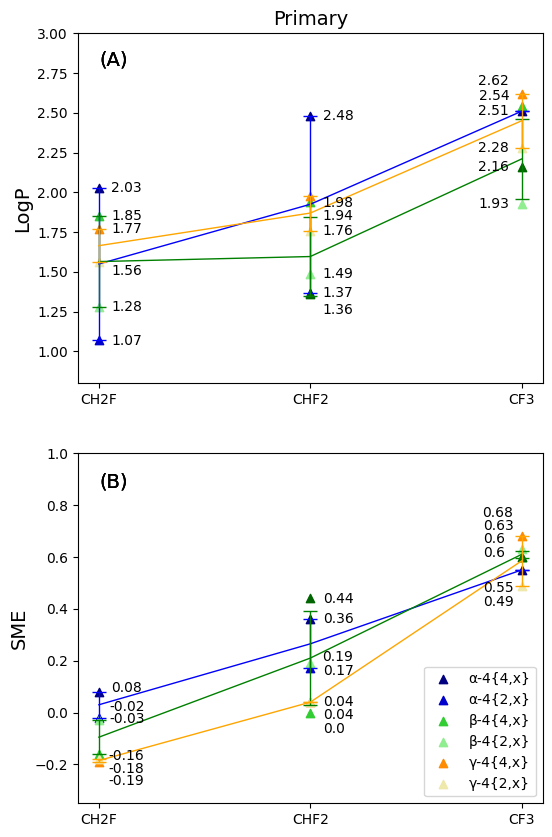

In [22]:
import matplotlib.pyplot as plt
from matplotlib import container
import numpy as np
import itertools


cyclopropane_color = {1: 'midnightblue', 2: 'darkgreen'}
cyclobutane_color = {1: 'navy', 2: 'limegreen', 3: 'darkorange'}
cyclopentane_color = {1: 'royalblue', 2: 'springgreen', 3: 'navajowhite'}
cyclohexan_color = {1: 'lightsteelblue', 2: 'darkgreen', 3: 'goldenrod'}
cycloheptane_color = {1: 'slateblue', 2: 'mediumspringgreen', 3: 'limegreen'}
methane_color = {1: 'mediumblue', 2: 'lightgreen', 3: 'palegoldenrod'}

cyclopropane_name = {1: "", 2: "", 3: ""}
cyclobutane_name = {1: "α-4{4,x}", 2: "β-4{4,x}", 3: "γ-4{4,x}"} # {1: "α-4{4,x}", 2: "trans-β-4{4,x}", 3: "γ-4{4,x}"}
cyclopentane_name = {1: "", 2: "β-4{5,x}", 3: ""}
cyclohexan_name = {1: "", 2: "β-4{6,x}", 3: ""}
cycloheptane_name = {1: "", 2: "", 3: ""}
methane_name = {1: "α-4{2,x}", 2: "β-4{2,x}", 3: "γ-4{2,x}"}  

line_color = {1: "blue", 2: "green", 3: "orange"}

cyclopropane_logP = {1: {'H': [1.29]}, 2: {'H': [1.29]}}
cyclobutane_logP = {1: {'H': [1.95]}, 2: {'H': [1.95]}, 3: {'H': [1.95]}}
cyclopentane_logP = {1: {'H': [2.23]}, 2: {'H': [2.23]}, 3: {'H': [2.23]}}
cyclohexan_logP = {1: {'H': [2.72]}, 2: {'H': [2.72]}, 3: {'H': [2.72]}, 4: {'H': [2.72]}}
cycloheptane_logP = {1: {'H': [3.03]}, 2: {'H': [3.03]}, 3: {'H': [3.03]}, 4: {'H': [3.03]}}
methane_logP = {1: {'H': [1.03], 'CF3': [1.76]}, 2: {'H': [1.31]}, 3: {'H': [1.72]}, 4: {}}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))

for distance_global in range(1, 4):

    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
        f_group = SMILES_to_fgroup[SMILES]

        if f_group not in X_optimal:
            continue
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            print("cycloheptane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    print("="*30)
    is_chf2 = False
    is_cf3 = False
    for molecule_group, color, label, logP_dict in [(cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP),
                                                    (cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP), 
                                                    # (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    # (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    # (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        
        # print(X_local, y_relevance, color[distance_global], label[distance_global])
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -17, -6

            # print(len(str(y_logP[i])), y_relevance[i])
            if len(str(y_relevance[i])) == 3:
                x_shift -= 3
            
            if X_local[i] == "CH2F":
                if y_relevance[i] == -0.16:
                    y_shift = -4
                elif y_relevance[i] == -0.18:
                    y_shift = -10
                elif y_relevance[i] == -0.19:
                    y_shift = -17
                elif y_relevance[i] == -0.02:
                    y_shift = 5
                elif y_relevance[i] == -0.03:
                    y_shift = -2
                elif y_relevance[i] == 0.08:
                    y_shift = 0
            
            elif X_local[i] == "CHF2":
                if y_relevance[i] == 0.0:
                    y_shift = -15
                elif y_relevance[i] == 0.04 and is_chf2 == False:
                    y_shift = -12
                    print(is_chf2)
                    is_chf2 = True
                elif y_relevance[i] == 0.17:
                    y_shift = -5
                elif y_relevance[i] == 0.19:
                    y_shift = 2
            elif X_local[i] == "CF3":
                if y_relevance[i] == 0.49:
                    y_shift = -15
                elif y_relevance[i] == 0.55:
                    y_shift = -16
                elif y_relevance[i] == 0.6 and is_cf3 == False:
                    y_shift = 0
                    is_cf3 = True
                elif y_relevance[i] == 0.6 and is_cf3 == True:
                    y_shift = 10
                elif y_relevance[i] == 0.63:
                    y_shift = 14
                elif y_relevance[i] == 0.68:
                    y_shift = 14
            
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
            print(X_local[i], y_relevance[i])
        
        print(X_local)
        print(y_logP)
        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -20, -3
            
            if len(str(y_logP[i])) == 3:
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_logP[i] == 1.56:
                    y_shift = -9

            elif X_local[i] == "CHF2":
                if y_logP[i] == 1.36:
                    y_shift = -14
                elif y_logP[i] == 1.94:
                    y_shift = -13
                elif y_logP[i] == 1.98:
                    y_shift = -8
                
            elif X_local[i] == "CF3":
                if y_logP[i] == 2.54:
                    y_shift = 5
                elif y_logP[i] == 2.62:
                    y_shift = 6

            # print(X_local[i], y_logP[i])

            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')

    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    print(X, Y)
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.set_ylabel("SME", fontsize=14)
    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax1.set_xlabel("Fluorine groups")
    ax1.set_ylim(-0.35, 1)

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.set_ylim(0.8, 3)
    ax2.set_ylabel("LogP", fontsize=14)
    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax2.set_xlabel("Fluorine groups")
    ax2.set_title("Primary", fontsize=14)

    handles, labels = ax1.get_legend_handles_labels()
    handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]

    ax1.legend(loc='lower right')
    # ax2.legend()

    ax2.text(0.0, 2.8, '(A)', fontsize = 14)
    ax1.text(0.0, 0.87, '(B)', fontsize = 14)

    

# plt.show()    
    




--------

--------

--------

--------

--------

ACIDIC SME

In [23]:

if is_predicted_logP:
    relevances_fluorine = {}
    for SMILES, relevance in relevances_fluorine_all.items():
        if "acid" in SMILES_to_identificator[SMILES].lower():
            mol = Chem.MolFromSmiles(SMILES)

            f_group = SMILES_to_fgroup[SMILES]
            f_group_smiles = functional_group_to_smiles_for_logP_non_H[f_group]
            
            mol_fluorine = Chem.MolFromSmiles(f_group_smiles)
            mol_without_F = remove_substructure(mol, mol_fluorine)
            smiles_without_F = Chem.MolToSmiles(mol_without_F)

            non_f_relevance = find_relevance_for_non_canon_mol(smiles_without_F, relevances_fluorine_all)
            if non_f_relevance is not None:
                relevances_fluorine[SMILES] = round(relevance - find_relevance_for_non_canon_mol(smiles_without_F, relevances_fluorine_all), 3)
else:
    relevances_fluorine = {}
    for SMILES, relevance in relevances_fluorine_all.items():
        if "acid" in SMILES_to_identificator[SMILES].lower():
            relevances_fluorine[SMILES] = relevance

cyclopropane = {1: {}, 2: {}}
cyclobutane = {1: {}, 2: {}, 3: {}} # logP_O=C(N1CCC1)C1=CC=CC=C1
cyclopentane = {1: {}, 2: {}, 3: {}} #  logP_O=C(N1CCCC1)C1=CC=CC=C1
cyclohexan = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(N1CCCCC1)C1=CC=CC=C1
cycloheptane = {1: {}, 2: {}, 3: {}, 4: {}} # logP_O=C(NC1CCCCCC1(F)F)c1ccccc1
methane = {1: {}, 2: {}, 3: {}, 4: {}} # 1: CNC(=O)C1=CC=CC=C1, 2: CCNC(=O)C1=CC=CC=C1 , 3: CCCNC(=O)C1=CC=CC=C1


In [24]:
def find_the_closest_oxygen_atom(
        mol, atom_id: int, 
        atoms_not_to_visit: list = []):

    queue = deque([(atom_id, 0)])

    visited = set()
    
    while queue:
        current_atom, distance = queue.popleft()
        if mol.GetAtomWithIdx(current_atom).GetSymbol().lower() == 'o':
            break

        visited.add(current_atom)
        
        neighbors = []
        for atom in mol.GetAtomWithIdx(current_atom).GetNeighbors():
            if atom.GetSymbol().lower() == 'h':
                continue
            if atom.GetIdx() in atoms_not_to_visit:
                continue
            neighbors.append(atom.GetIdx())
        
        for neighbor in neighbors:
            if neighbor not in visited:
                queue.append((neighbor, distance + 1))
    
    return current_atom, distance - 2

In [25]:
from rdkit import Chem
import math

smiles_to_distance_to_nitrogen = {}

def is_primary_amine(mol):
    # find nitrogen atom
    for atom in mol.GetAtoms():
        if atom.GetSymbol().lower() == 'n':
            nitrogen_atom_idx = atom.GetIdx()

    if not mol.GetAtomWithIdx(nitrogen_atom_idx).IsInRing():
        return True

    logP_ring_mol = Chem.MolFromSmiles('C1=CC=CC=C1')

    logP_ring_mol_match = list(mol.GetSubstructMatches(logP_ring_mol)[0])

    for atom in mol.GetAtomWithIdx(nitrogen_atom_idx).GetNeighbors():
        if atom.GetIdx() in logP_ring_mol_match:
            return True

    return False


for SMILES, relevance in relevances_fluorine.items():
    f_group_smiles = functional_group_to_smiles[SMILES_to_fgroup[SMILES]]

    mol = Chem.MolFromSmiles(SMILES)

    fluorine_deratives_mol = Chem.MolFromSmiles(f_group_smiles)

    derivatives_matches = mol.GetSubstructMatches(fluorine_deratives_mol)
    

    min_distance_to_nitrogen = math.inf
    
    for match in derivatives_matches:
        from_atom = match[0]

        target_atom, distance = find_the_closest_oxygen_atom(mol=mol, atom_id=from_atom)
        
        if distance < min_distance_to_nitrogen:
            min_distance_to_nitrogen = distance

    smiles_to_distance_to_nitrogen[SMILES] = min_distance_to_nitrogen

    if SMILES_to_cycle_type[SMILES] == 'methane' and f_group_smiles == "":
        smiles_to_distance_to_nitrogen[SMILES] = len(mol.GetAtoms()) - 2 - 8

    # print(SMILES, is_secondary_amine_mol)
    # if not is_secondary_amine_mol:
    #     smiles_to_distance_to_nitrogen[SMILES] = math.inf
    
    print(SMILES, derivatives_matches, SMILES_to_fgroup[SMILES], min_distance_to_nitrogen, SMILES_to_cycle_type[SMILES])

O=C(NC1=CC=CC=C1)C1CCCCC1 () non-F inf cyclohexane
O=C(NC1=CC=CC=C1)[C@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
O=C(NC1=CC=CC=C1)[C@@H]1C[C@@H]2C[C@@H]2C1 () non-F inf bicyclo[3.1.0]hexane
FC1(F)[C@H]2C[C@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 3 bicyclo[3.1.0]hexane
FC1(F)[C@H]2C[C@@H](C[C@@H]12)C(=O)NC1=CC=CC=C1 ((1, 0), (1, 2)) gem-CF2 3 bicyclo[3.1.0]hexane
O=C(NC1=CC=CC=C1)C1CCC1 () non-F inf cyclobutane
FCC1(CCC1)C(=O)NC1=CC=CC=C1 ((2, 1, 0),) CH2F 0 cyclobutane
FC(F)C1(CCC1)C(=O)NC1=CC=CC=C1 ((3, 1, 0, 2),) CHF2 0 cyclobutane
FC(F)(F)C1(CCC1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 0 cyclobutane
FC(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 2 cyclobutane
FC(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((4, 1, 0, 2, 3),) CF3 2 cyclobutane
[H]C(F)(F)[C@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 2 cyclobutane
[H]C(F)(F)[C@@H]1C[C@@H](C1)C(=O)NC1=CC=CC=C1 ((3, 0, 1, 2),) CHF2 2 cyclobutane
[H]C([H])(F)[C@H]1C[C@@H](C1)C(=O)NC1

['CH2F', 'CHF2', 'CF3'] [0.15, 0.35, 0.6] midnightblue β-6{3,x}
CH2F 1.12
CHF2 2.35
CF3 2.12
['CH2F', 'CHF2', 'CF3'] [-0.18, -0.07, 0.5] navy cis-β-6{4,x}
CH2F 2.11
CHF2 2.22
CF3 2.88
[] [] royalblue 
[] [] lightsteelblue 
[] [] slateblue 
[] [] darkgreen 
['CH2F', 'CHF2', 'CF3'] [-0.3, -0.03, 0.59] limegreen γ-6{4,5}
CH2F 1.96
CHF2 2.23
CF3 2.72
[] [] springgreen 
[] [] darkgreen 
[] [] mediumspringgreen 
[] [] darkorange 
[] [] navajowhite 
[] [] goldenrod 
[] [] limegreen 


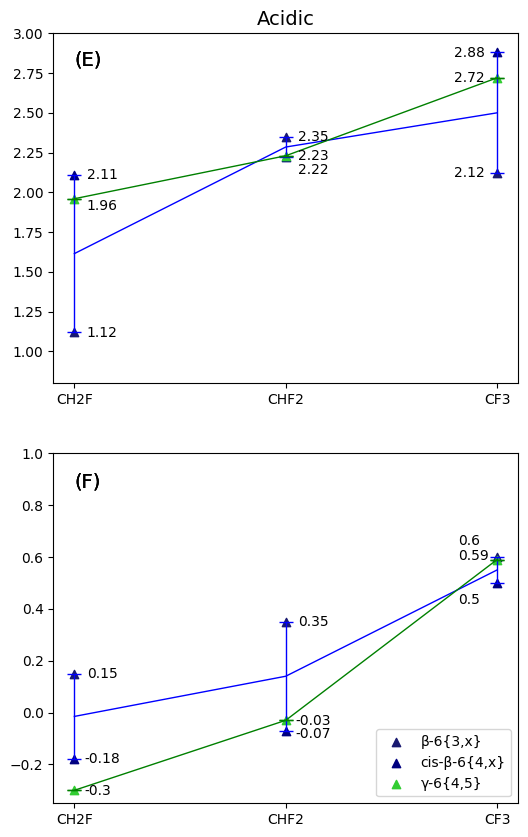

In [26]:
import matplotlib.pyplot as plt
import numpy as np

cyclopropane_color = {1: 'midnightblue', 2: 'darkgreen'}
cyclobutane_color = {1: 'navy', 2: 'limegreen', 3: 'darkorange'}
cyclopentane_color = {1: 'royalblue', 2: 'springgreen', 3: 'navajowhite'}
cyclohexan_color = {1: 'lightsteelblue', 2: 'darkgreen', 3: 'goldenrod'}
cycloheptane_color = {1: 'slateblue', 2: 'mediumspringgreen', 3: 'limegreen'}
methane_color = {1: 'mediumblue', 2: 'lightgreen', 3: 'palegoldenrod'}

line_color = {1: "blue", 2: "green", 3: "orange"}

cyclopropane_name = {1: "β-6{3,x}", 2: "", 3: ""}
cyclobutane_name =  {1: "cis-β-6{4,x}", 2: "γ-6{4,5}", 3: ""}
cyclopentane_name = {1: "", 2: "", 3: ""}
cyclohexan_name =   {1: "", 2: "", 3: ""}
cycloheptane_name = {1: "", 2: "", 3: ""}
methane_name =      {1: "", 2: "", 3: ""} 

cyclopropane_logP = {1: {'H': [1.92]}, 2: {'H': [1.92]}}
cyclobutane_logP = {1: {'H': [2.26]}, 2: {'H': [2.26]}, 3: {'H': [2.26]}}
cyclopentane_logP = {1: {'H': [2.68]}, 2: {'H': [2.68]}, 3: {'H': [2.68]}}
cyclohexan_logP = {1: {'H': [2.49]}, 2: {'H': [2.49]}, 3: {'H': [2.49]}, 4: {'H': [2.49]}}
cycloheptane_logP = {1: {'H': [3.24]}, 2: {'H': [3.24]}, 3: {'H': [3.24]}, 4: {'H': [3.24]}}
methane_logP = {1: {}, 2: {}, 3: {}}

fig, ((ax2, ax1)) = plt.subplots(2, 1, figsize=(6, 10))

for distance_global in range(1, 4):

    # X_optimal = ['H', 'CH2F', 'CHF2', 'CF3']
    X_optimal = ['CH2F', 'CHF2', 'CF3']
    # X_optimal = ['H', 'CHF', 'CH2F', 'gem-CF2', 'CHF2', 'CF3']
    for SMILES, distance in smiles_to_distance_to_nitrogen.items():
        logP_value = SMILES_to_logP[SMILES]
    
        if distance != distance_global:
            continue
        
        if 'cyclopropane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopropane:
                cyclopropane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopropane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopropane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopropane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclopropane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cyclohexane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclohexan:
                cyclohexan[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclohexan_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclohexan[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclohexan_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        if 'cycloheptane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cycloheptane:
                cycloheptane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cycloheptane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cycloheptane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cycloheptane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclohexane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclopentane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclopentane:
                cyclopentane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclopentane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclopentane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclopentane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclopentane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

        elif 'cyclobutane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group in cyclobutane:
                cyclobutane[distance_global][f_group].append(relevances_fluorine[SMILES])
                cyclobutane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                cyclobutane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                cyclobutane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("cyclobutane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])
        
        elif 'methane' == SMILES_to_cycle_type[SMILES]:
            
            f_group = SMILES_to_fgroup[SMILES]
            if f_group == 'non-F':
                continue
            if f_group in methane:
                methane[distance_global][f_group].append(relevances_fluorine[SMILES])
                methane_logP[distance_global][f_group].append(SMILES_to_logP[SMILES])
            else:
                methane[distance_global][f_group] = [relevances_fluorine[SMILES]]
                methane_logP[distance_global][f_group] = [SMILES_to_logP[SMILES]]
            # print("methane", f_group, SMILES, logP_value, relevances_fluorine[SMILES])

    X, Y, Y_logP = [], [], []
    Y_dict = {f_group: [] for f_group in X_optimal}
    Y_logP_dict = {f_group: [] for f_group in X_optimal}
    for molecule_group, color, label, logP_dict in [(cyclopropane, cyclopropane_color, cyclopropane_name, cyclopropane_logP),
                                                    (cyclobutane, cyclobutane_color, cyclobutane_name, cyclobutane_logP), 
                                                    (cyclopentane, cyclopentane_color, cyclopentane_name, cyclopentane_logP), 
                                                    (cyclohexan, cyclohexan_color, cyclohexan_name, cyclohexan_logP), 
                                                    (cycloheptane, cycloheptane_color, cycloheptane_name, cycloheptane_logP), 
                                                    # (methane, methane_color, methane_name, methane_logP)
                                                    ]:
        y_relevance, y_logP, X_local = [], [], []
        if distance_global not in molecule_group:
            continue

        for f_group_optimal in X_optimal:
            if f_group_optimal not in molecule_group[distance_global]:
                continue
            X_local.append(f_group_optimal)

            Y_dict[f_group_optimal].append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            y_relevance.append(sum(molecule_group[distance_global][f_group_optimal]) / len(molecule_group[distance_global][f_group_optimal]))
            Y_logP_dict[f_group_optimal].append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))
            y_logP.append(sum(logP_dict[distance_global][f_group_optimal]) / len(logP_dict[distance_global][f_group_optimal]))

        print(X_local, y_relevance, color[distance_global], label[distance_global])
        ax1.scatter(X_local, y_relevance, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -17, -6

            # print(len(str(y_logP[i])), y_relevance[i])
            if len(str(y_relevance[i])) == 3 or (len(str(y_relevance[i])) == 4 and '-' in str(y_relevance[i])):
                x_shift -= 3

            if X_local[i] == "CHF2":
                if y_relevance[i] == -0.07:
                    y_shift = -5
            if X_local[i] == "CF3":
                if y_relevance[i] == 0.59:
                    y_shift = 0
                elif y_relevance[i] == 0.6:
                    y_shift = 9
                elif y_relevance[i] == 0.5:
                    y_shift = -15
            
            ax1.annotate(f"{str(y_relevance[i])}", (X_local[i], y_relevance[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
            # print(X_local[i], y_relevance[i])
        
        ax2.scatter(X_local, y_logP, marker='^', linestyle='-', color=color[distance_global], label=label[distance_global])
        for i in range(len(X_local)):
            x_shift, y_shift = 20, -3
            if i + 1 == len(X_local) and X_local[i] == "CF3":
                x_shift, y_shift = -20, -3
            
            if len(str(y_logP[i])) == 3:
                x_shift -= 3

            if X_local[i] == "CH2F":
                if y_logP[i] == 1.96:
                    y_shift = -8
            elif X_local[i] == "CHF2":
                if y_logP[i] == 2.22:
                    y_shift = -12

            ax2.annotate(f"{str(y_logP[i])}", (X_local[i], y_logP[i]), xytext=(x_shift, y_shift), textcoords='offset points', ha='center')
            print(X_local[i], y_logP[i])
    
    
    for f_group_name, relevances in Y_dict.items():
        if relevances != []:
            X.append(f_group_name)
            Y.append(relevances)
            Y_logP.append(Y_logP_dict[f_group_name])
    
    mean_Y = [np.array(i).mean() for i in Y]
    std_deviation_Y = [np.array(i).std() for i in Y]
    
    ax1.plot(X, mean_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    for i in range(len(X)):
        ax1.errorbar(X[i], mean_Y[i], yerr=std_deviation_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax1.set_xlabel("Fluorine groups")
    ax1.set_ylim(-0.35, 1)

    mean_logP_Y = [np.array(i).mean() for i in Y_logP]
    std_deviation_logP_Y = [np.array(i).std() for i in Y_logP]
    
    ax2.set_ylim(0.8, 3)
    ax2.plot(X, mean_logP_Y, linestyle='-', color=line_color[distance_global], label="_no_legend", linewidth=1)
    for i in range(len(X)):
        ax2.errorbar(X[i], mean_logP_Y[i], yerr=std_deviation_logP_Y[i], color=line_color[distance_global], capsize=5, elinewidth=1, markeredgewidth=1)
    # ax2.set_xlabel("Fluorine groups")
    ax2.set_title("Acidic", fontsize=14)

    ax1.legend(loc='lower right')
    # ax2.legend()

    ax2.text(0.0, 2.8, '(E)', fontsize = 14)
    ax1.text(0.0, 0.87, '(F)', fontsize = 14)

plt.show()


